In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
#re-sizing all the images to sizes [224,224]
IMAZE_SIZE =[224,224]
train_path = '/content/drive/MyDrive/tfi_train'
valid_path ='/content/drive/MyDrive/tfi_test'


In [ ]:
vgg16 = VGG16(input_shape = IMAZE_SIZE+[3],weights ='imagenet',include_top =False)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
#getting no.of classes
folders = glob('/content/drive/MyDrive/tfi_train/*')
folders


['/content/drive/MyDrive/tfi_train/vijaydevarakonda',
 '/content/drive/MyDrive/tfi_train/nagchai',
 '/content/drive/MyDrive/tfi_train/prabhas',
 '/content/drive/MyDrive/tfi_train/mahesh',
 '/content/drive/MyDrive/tfi_train/ntr',
 '/content/drive/MyDrive/tfi_train/ramcharan',
 '/content/drive/MyDrive/tfi_train/alluarjun',
 '/content/drive/MyDrive/tfi_train/nani']

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction =Dense(len(folders),activation ='softmax')(x)

In [ ]:
model = Model(inputs =vgg16.input,outputs =prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#giving cost and optimization methods
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range=0.2,
                                   zoom_range =0.2,
                                   horizontal_flip =True)

In [ ]:
test_datagen =ImageDataGenerator(rescale=1./255)

In [ ]:
training_set =train_datagen.flow_from_directory(train_path,
                                           target_size =(224,224),
                                           batch_size =32,
                                           class_mode ='categorical')

Found 1984 images belonging to 8 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                       target_size =(224,224),
                                       batch_size =32,
                                       class_mode ='categorical')

Found 466 images belonging to 8 classes.


In [ ]:
r = model.fit_generator(
    training_set,
    validation_data =test_set,
    epochs =5,
    steps_per_epoch =len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-20-e70f27ad9cf3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
62/62 [==============================] - 624s 10s/step - loss: 2.2208 - accuracy: 0.2772 - val_loss: 1.2494 - val_accuracy: 0.5472
Epoch 2/5
62/62 [==============================] - 43s 701ms/step - loss: 1.2534 - accuracy: 0.5570 - val_loss: 0.7722 - val_accuracy: 0.7682
Epoch 3/5
62/62 [==============================] - 44s 705ms/step - loss: 0.9615 - accuracy: 0.6880 - val_loss: 0.6140 - val_accuracy: 0.8433
Epoch 4/5
62/62 [==============================] - 44s 709ms/step - loss: 0.7494 - accuracy: 0.7500 - val_loss: 0.4210 - val_accuracy: 0.9099
Epoch 5/5
62/62 [==============================] - 43s 694ms/step - loss: 0.6123 - accuracy: 0.8100 - val_loss: 0.3849 - val_accuracy: 0.8906


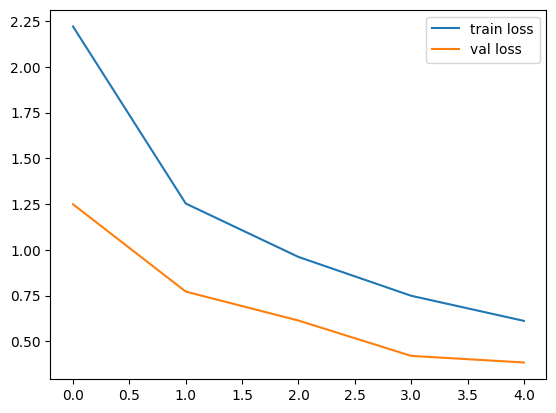

<Figure size 640x480 with 0 Axes>

In [ ]:
#loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label ='val loss')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


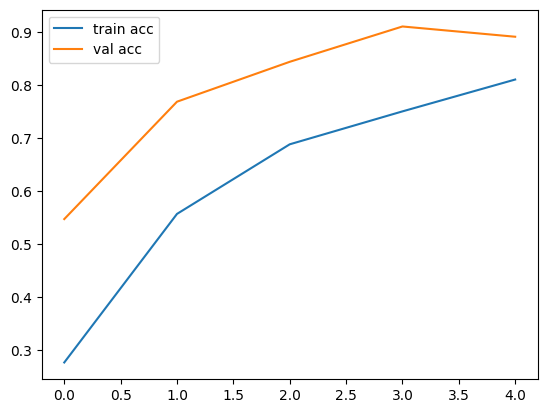

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label ='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('tollywood_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('tollywood_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>